## Unsupervised Learning Example: Anomaly Detection
Unsupervised learning is a different type of model than regression and classification. When well-labeled data is unavailable and creating a labeled dataset is inaccessible, unsupervised learning is the ideal approach. 
The unsupervised approach allows the algorithm to detect patterns that may be too complex for a human to recognize. The algorithm reads teh unlabeled data and discovers hidden patterns within.

### Advantages of unsupervised learning:
1. it is cost-efficient bc it doesn't require labeling. We dont' need to tell the algorithm what is a problematic aircraft and what isn't.
2. It can help us gain insight into the structure of the data. We can ID some hidden relationships among mechanical parts that might not be obvious to human eyes
3. It can help us identify interesting cases in a complex data structure.

## Clustering and k-Means
Anomaly detection is less-frequently used in the educational world.
Clustering is a more common algorithm which seeks to learn, from the properties of the data, an optimal division or discrete labeling of groups of points. 

<mark>The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.</mark> It accomplishes this using a simple conception of what the optimal clustering looks like:
* The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

These two assumptions are the basis of the k-means model. 

In [1]:
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd

First we'll create a dataset for this example [2 & 3]

In [2]:
from sklearn.datasets import make_blobs
    # importing make_blobs helps us simulate data on a 2D plane
    
twoDData, cluster_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)
# This function returns two things: (a). A set of data, and (b). the true labels for each observation. 
# We'll store them in two variables: twoDData and cluster_true

print("Here are the first 10 rows of twoDData:")
print(twoDData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoDData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


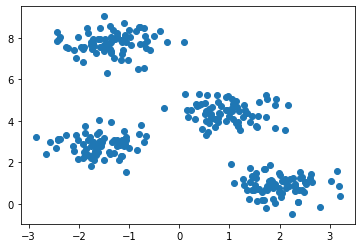

In [3]:
plt.scatter(twoDData[:, 0], twoDData[:, 1]);
# k-means algorithm uses sklearn to automatically make the clusters obvious/easy to observe

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=4)
    # Initialize the model by telling KMeans() the number of k.
    
kmeans.fit(twoDData)
    # Feed the data to the model.
    
cluster_kmeans = kmeans.predict(twoDData)
    # Call predict() and use the data to get the clustering result.
    
## Note: in some tutorials, KMeans() might use an extra parameter called random_state -- this is for seeding. You can use any number

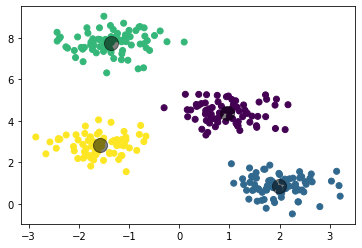

In [6]:
# Next, plot the data with colored labels to visualize the results. 
#We'll also use the k-means estimator to determine & plot the cluster centers.

plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap = 'viridis')
# Use cluster_means as the indicator for clusters

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#plotting the centers onto scatter plot

# c is for color, s is for dot size, and alpha is for transparency

In this simple case, the k-means algorithm assigns the points to clusters very similarly to how we might assign them by eye.

## Silhouette Coefficient and Silhouette Plot
### Silhouette Coefficient 
* used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model.
* Calculated using (a) the mean intra-cluster distance and (b) the mean nearest-cluster distance for all samples.
* The Silhouette Coefficient for a sample is
    (b - a)/max(a,b)
    * b is the distance between a sample and the nearest cluster that the sample is not a part of.
* Silhouette Coefficient is only defined if # of labels is 2 <= n_labels <= n_samples - 1

* This process produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering

from <mark>sklearn.metrics</mark>, we can call a <mark>silhouette_score</mark>.
    This returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use <mark>silhouette_samples</mark>

In [7]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric='euclidean')

#Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.7356713838266389


### Obtain the silhouette plot
* Quickest way is through the <mark>Silhouette Visualizer</mark>, which <ins>displays the silhouette coefficient for each sample on a per-cluster basis</ins>
    * helps us visualize which clusters are dense and which are not

In [8]:
# Had to run
    # conda install -c districtdatalabs yellowbrick
    # &
    # pip install yellowbrick==1.3.post1
# in terminal first in order to get next line (import from yellowbrick) to work

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

In [10]:
smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

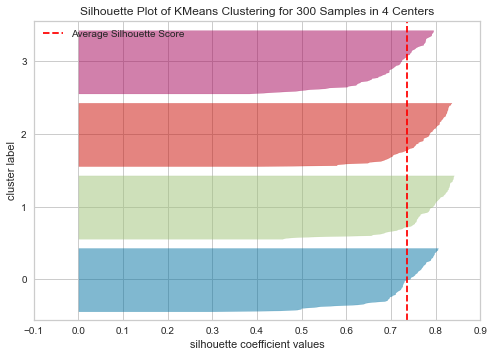

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
visualizer.fit(twoDData)
    # Fit the data to the visualizer
visualizer.show()
    # Finalize and render teh figure.
    ## These two lines need to be run at the same time. Otherwise, there won't be labels in the x&y axes

The same functionality above can be achieved with the associated quick method <mark>silhouette_visualizer</mark>.
This method will build the Silhouette Visualizer object with the associated arguments, fit it, then immediately show it.

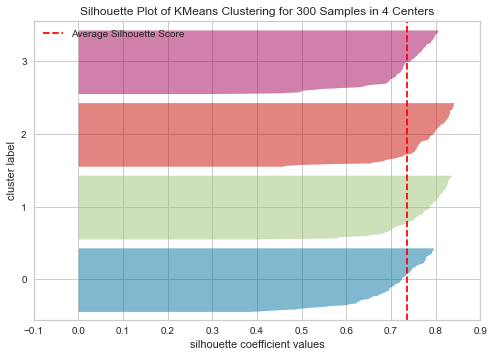

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [12]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, twoDData, colors='yellowbrick')

## Clustering with k-Means: Self-Reported Motivation
Next we look at a more realistic example of students' self-reported motivation.
This data contains some self-reported motivation scores for a class over 5 weeks. We'll look for patterns in motivation over this time and sort people into clusters based on those patterns.

In [13]:
motivation = pd.read_csv("ICE5_Data.csv")
motivation
# we'll manipulate the data frame into a structure that can be analyzed by our clustering algorithm.
# This algorithm will treat each row as a value belonging to a person, so we need to remove hte id variable.
# We also need to filter out the NaNs b/c k-Means won't work with partial data.

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN
5,10014216,2,NaN,2,NaN,2.0
6,10021216,2,2.0,2,2.0,2.0
7,10013216,2,NaN,2,NaN,1.0
8,10035216,2,3.0,2,3.0,NaN
9,10015216,2,2.0,2,2.0,2.0


In [14]:
motivationNA = motivation.dropna()
motivationClean = motivationNA.drop(['id'], axis = 1)
motivationClean

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0
9,2,2.0,2,2.0,2.0
11,2,1.0,2,1.0,2.0
13,2,3.0,2,3.0,1.0
14,1,1.0,1,1.0,4.0
16,1,1.0,1,1.0,3.0
17,1,1.0,1,1.0,1.0
18,1,1.0,1,1.0,1.0


In [15]:
## Trying a 2-cluster model first to check out the silhouette plot as well as the coefficient
motivationkmeans2 = KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2 = motivationkmeans2.predict(motivationClean)

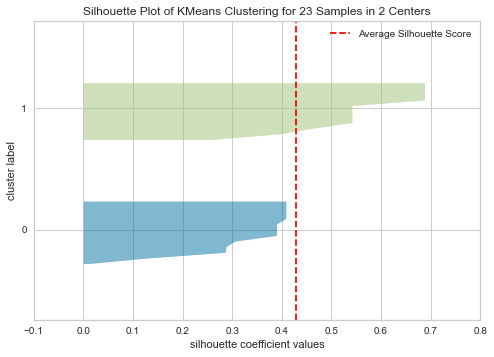

Silhouetter Score: 0.4278253443934091


In [16]:
silhouette_visualizer(motivationkmeans2, motivationClean, colors='yellowbrick')

silhouetteScore2 = silhouette_score(motivationClean, cluster_motivation2, metric='euclidean')

print('Silhouetter Score:', silhouetteScore2)

from notes:
The score is 0.43 and the silhouette plot is not too bad. We can see that Cluster 0 has a lot more similarities while Cluster 1 is more heterogeneous. So we may want to increase the cluster number.

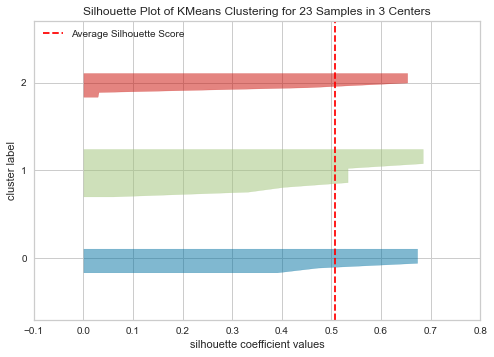

Silhouetter Score: 0.5078715772811808


In [18]:
# cluster_n = 3 allows us to try 3 clusters, which increases the silhouette coefficient and gives all 3 clusters similar intra-cluster similarity (ie flat head)

motivationkmeans3 = KMeans(n_clusters=3)
motivationkmeans3.fit(motivationClean)
cluster_motivation3 = motivationkmeans3.predict(motivationClean)
silhouette_visualizer(motivationkmeans3, motivationClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(motivationClean, cluster_motivation3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

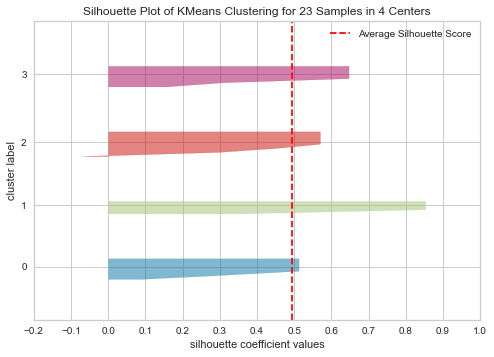

Silhouetter Score: 0.4939757511461826


In [19]:
# Try 4 clusters. Not too much different, the silhouette coefficient drops and all four clusters still have similar intra-cluster similarity. 
# Bc of this minimal change, we'll say cluster_n = 3 is the more reasonable classification

motivationkmeans4 = KMeans(n_clusters=4)
motivationkmeans4.fit(motivationClean)
cluster_motivation4 = motivationkmeans4.predict(motivationClean)
silhouette_visualizer(motivationkmeans4, motivationClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(motivationClean, cluster_motivation4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

Now we'll create a new dataframe to contain the clustering result. The regular <mark>=</mark> won't work bc <mark>motivationClean</mark> will be changed as <mark>motivation3cluster</mark> changes.

In [20]:
motivation3cluster = motivationClean.copy(deep=True)

motivation3cluster['cluster'] = cluster_motivation3

motivation3cluster

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,0
2,1,2.0,1,2.0,2.0,2
6,2,2.0,2,2.0,2.0,0
9,2,2.0,2,2.0,2.0,0
11,2,1.0,2,1.0,2.0,2
13,2,3.0,2,3.0,1.0,0
14,1,1.0,1,1.0,4.0,1
16,1,1.0,1,1.0,3.0,1
17,1,1.0,1,1.0,1.0,2
18,1,1.0,1,1.0,1.0,2


Using silhouette plots is one good method for determining the number of clusters, but another one is called the <mark>elbow method</mark>. It uses the sum of squared distances of samples to their closest cluster center (i.e., k-Means method's stopping rule) to gauge when to stop. The implementation will require you to know how to write a loop.

FMI: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/